# Tune sigma

## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from src.experiments.datasets import Dataset, pressure_ds, kitchen_ds, diatom_ds
import src.experiments.laplacian_score as ls

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [3]:
f = pressure_ds.features
D = pressure_ds.dtw_distance_matrix

In [4]:
D.mean()

9721.062326929816

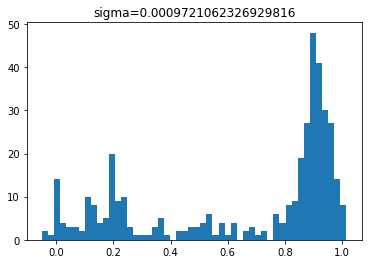

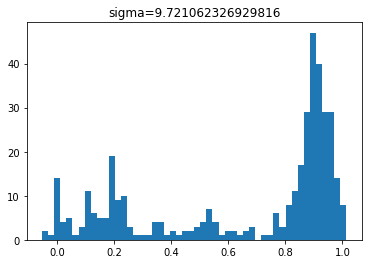

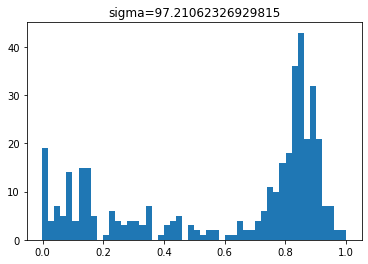

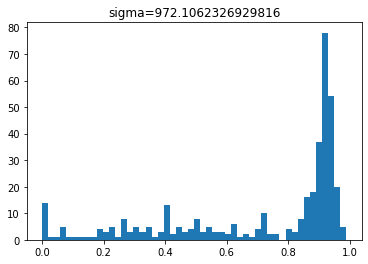

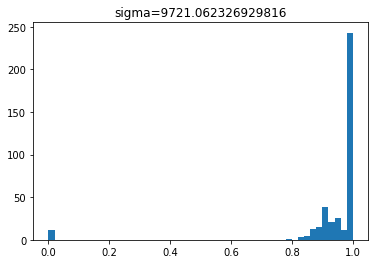

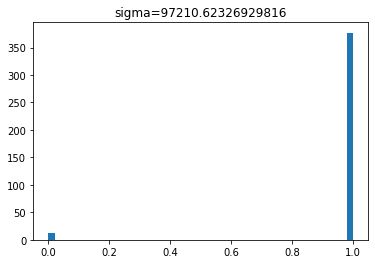

In [5]:
res = {}
Dmean = D.mean()
for sigma_rel in [1e-7, 1e-3, 1e-2 * Dmean, 0.1 * Dmean, Dmean, 10 * Dmean]:
    S = ls.compute_weight_matrix(pressure_ds, n_neighbors=5, sigma=sigma_rel, precomputed_distances=D)
    lscores = ls.laplacian_score(f, S)
    res[sigma_rel] = lscores
    plt.hist(lscores, bins=50)
    plt.title(f'sigma_rel={sigma_rel}')
    plt.show()